In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np

In [2]:
file = r'C:\Users\jayes\Downloads\archive (1)\fold1\7061-6-0-0.wav'

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

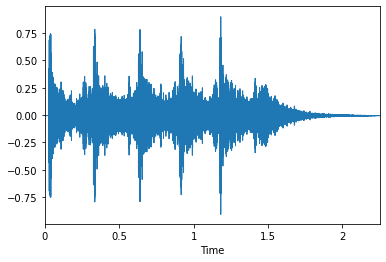

In [4]:
data , sample_rate = librosa.load(file)
librosa.display.waveplot(data, sr=sample_rate)

In [5]:
plt.figure(figsize=(5,3))
ipd.Audio(file)

<Figure size 360x216 with 0 Axes>

In [6]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0231203e-05,
       2.3116412e-05, 0.0000000e+00], dtype=float32)

In [7]:
import pandas as pd

In [8]:
df =  pd.read_csv(r'C:\Users\jayes\Downloads\archive (1)\UrbanSound8K.csv')

In [9]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='classID', ylabel='count'>

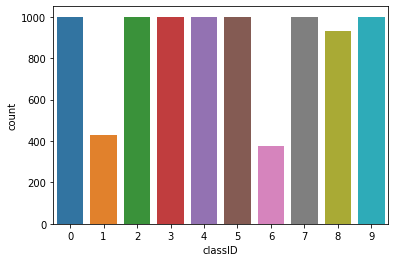

In [11]:
import seaborn as sns
sns.countplot(df['classID'])

<AxesSubplot:xlabel='class', ylabel='count'>

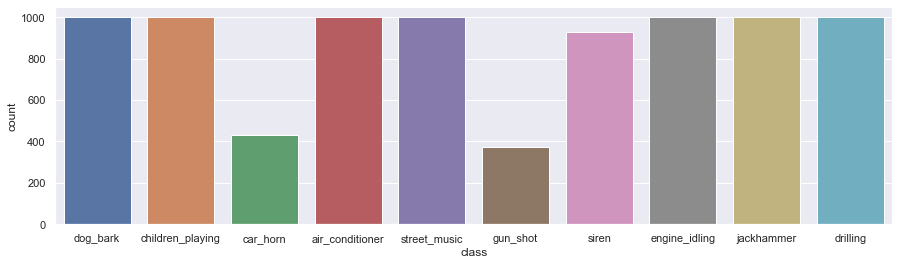

In [12]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 4)})
sns.countplot(df['class'])

In [13]:
df['classID'].value_counts()

3    1000
2    1000
0    1000
9    1000
5    1000
7    1000
4    1000
8     929
1     429
6     374
Name: classID, dtype: int64

In [14]:
mfccs_features = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)

In [15]:
mfccs_features

array([[-9.38001938e+01,  7.49646759e+00,  1.54761038e+01, ...,
        -5.69353333e+02, -5.91727417e+02, -6.10556335e+02],
       [ 3.07740345e+01,  2.37197456e+01,  1.14163637e+01, ...,
         4.30511932e+01,  2.58881645e+01,  1.29275656e+01],
       [-3.28665113e+00, -1.20303555e+01, -1.50050745e+01, ...,
        -1.11037197e+01, -7.55049467e+00,  2.22121850e-01],
       ...,
       [ 6.42665267e-01, -3.26032782e+00, -4.75591755e+00, ...,
         2.40957737e+00,  3.16990972e+00, -1.54335305e-01],
       [-1.00018282e+01, -9.35991478e+00, -6.44673729e+00, ...,
        -5.01999855e-02,  7.28940845e-01, -8.39656711e-01],
       [ 1.94219398e+00,  2.07361221e+00,  3.06835985e+00, ...,
        -2.06091857e+00, -2.23120260e+00, -1.72396398e+00]], dtype=float32)

In [16]:
df.head(3)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing


In [86]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features   

In [87]:
audio_path=r'C:\Users\jayes\Downloads\archive (1)'

In [88]:
extracted_features=[]

In [89]:
for index_num,row in df.iterrows():
    filename = os.path.join(os.path.abspath(audio_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))  
    data=features_extractor(filename)
    final_class_labels=row["class"]
    extracted_features.append([data,final_class_labels])

In [90]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [91]:
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [92]:
X.shape

(8732, 40)

In [93]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [94]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [95]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [97]:
y.shape

(8732, 10)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [100]:
num_labels=y.shape[1]

In [101]:
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [103]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [104]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
219/219 [==============================] - 2s 4ms/step - loss: 10.0985 - accuracy: 0.1214 - val_loss: 2.2914 - val_accuracy: 0.1088

Epoch 00001: val_loss improved from inf to 2.29144, saving model to saved_models\audio_classification.hdf5
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 2.4863 - accuracy: 0.1177 - val_loss: 2.2817 - val_accuracy: 0.1088

Epoch 00002: val_loss improved from 2.29144 to 2.28167, saving model to saved_models\audio_classification.hdf5
Epoch 3/200
219/219 [==============================] - 1s 5ms/step - loss: 2.3325 - accuracy: 0.1301 - val_loss: 2.2711 - val_accuracy: 0.1185

Epoch 00003: val_loss improved from 2.28167 to 2.27111, saving model to saved_models\audio_classification.hdf5
Epoch 4/200
219/219 [==============================] - 1s 5ms/step - loss: 2.2711 - accuracy: 0.1370 - val_loss: 2.2240 - val_accuracy: 0.1568

Epoch 00004: val_loss improved from 2.27111 to 2.22404, saving model to saved_models\audio_cla

Epoch 34/200
219/219 [==============================] - 1s 3ms/step - loss: 1.3199 - accuracy: 0.5529 - val_loss: 1.1213 - val_accuracy: 0.6234

Epoch 00034: val_loss improved from 1.14380 to 1.12126, saving model to saved_models\audio_classification.hdf5
Epoch 35/200
219/219 [==============================] - 1s 3ms/step - loss: 1.3002 - accuracy: 0.5479 - val_loss: 1.1059 - val_accuracy: 0.6394

Epoch 00035: val_loss improved from 1.12126 to 1.10590, saving model to saved_models\audio_classification.hdf5
Epoch 36/200
219/219 [==============================] - 1s 3ms/step - loss: 1.2879 - accuracy: 0.5538 - val_loss: 1.1149 - val_accuracy: 0.6153

Epoch 00036: val_loss did not improve from 1.10590
Epoch 37/200
219/219 [==============================] - 1s 3ms/step - loss: 1.2627 - accuracy: 0.5609 - val_loss: 1.1227 - val_accuracy: 0.6171

Epoch 00037: val_loss did not improve from 1.10590
Epoch 38/200
219/219 [==============================] - 1s 3ms/step - loss: 1.2696 - accuracy: 0


Epoch 00070: val_loss did not improve from 0.84807
Epoch 71/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0569 - accuracy: 0.6395 - val_loss: 0.8799 - val_accuracy: 0.7149

Epoch 00071: val_loss did not improve from 0.84807
Epoch 72/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0213 - accuracy: 0.6460 - val_loss: 0.8424 - val_accuracy: 0.7413

Epoch 00072: val_loss improved from 0.84807 to 0.84237, saving model to saved_models\audio_classification.hdf5
Epoch 73/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0383 - accuracy: 0.6503 - val_loss: 0.8327 - val_accuracy: 0.7396

Epoch 00073: val_loss improved from 0.84237 to 0.83265, saving model to saved_models\audio_classification.hdf5
Epoch 74/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0129 - accuracy: 0.6587 - val_loss: 0.8592 - val_accuracy: 0.7127

Epoch 00074: val_loss did not improve from 0.83265
Epoch 75/200
219/219 [======================


Epoch 00108: val_loss improved from 0.77252 to 0.75947, saving model to saved_models\audio_classification.hdf5
Epoch 109/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9823 - accuracy: 0.6730 - val_loss: 0.7863 - val_accuracy: 0.7464

Epoch 00109: val_loss did not improve from 0.75947
Epoch 110/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9555 - accuracy: 0.6770 - val_loss: 0.7978 - val_accuracy: 0.7384

Epoch 00110: val_loss did not improve from 0.75947
Epoch 111/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9809 - accuracy: 0.6689 - val_loss: 0.7666 - val_accuracy: 0.7636

Epoch 00111: val_loss did not improve from 0.75947
Epoch 112/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9461 - accuracy: 0.6723 - val_loss: 0.7550 - val_accuracy: 0.7602

Epoch 00112: val_loss improved from 0.75947 to 0.75497, saving model to saved_models\audio_classification.hdf5
Epoch 113/200
219/219 [=================

219/219 [==============================] - 1s 3ms/step - loss: 0.8975 - accuracy: 0.6953 - val_loss: 0.7358 - val_accuracy: 0.7624

Epoch 00148: val_loss did not improve from 0.71168
Epoch 149/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9000 - accuracy: 0.6933 - val_loss: 0.7128 - val_accuracy: 0.7705

Epoch 00149: val_loss did not improve from 0.71168
Epoch 150/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9111 - accuracy: 0.6883 - val_loss: 0.7193 - val_accuracy: 0.7762

Epoch 00150: val_loss did not improve from 0.71168
Epoch 151/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9018 - accuracy: 0.6879 - val_loss: 0.7046 - val_accuracy: 0.7848

Epoch 00151: val_loss improved from 0.71168 to 0.70460, saving model to saved_models\audio_classification.hdf5
Epoch 152/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9174 - accuracy: 0.6873 - val_loss: 0.7343 - val_accuracy: 0.7596

Epoch 00152: val_los

219/219 [==============================] - 1s 3ms/step - loss: 0.8887 - accuracy: 0.7018 - val_loss: 0.6841 - val_accuracy: 0.7825

Epoch 00188: val_loss did not improve from 0.67425
Epoch 189/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9061 - accuracy: 0.6992 - val_loss: 0.6841 - val_accuracy: 0.7848

Epoch 00189: val_loss did not improve from 0.67425
Epoch 190/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8709 - accuracy: 0.7094 - val_loss: 0.6891 - val_accuracy: 0.7790

Epoch 00190: val_loss did not improve from 0.67425
Epoch 191/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8861 - accuracy: 0.6994 - val_loss: 0.7128 - val_accuracy: 0.7739

Epoch 00191: val_loss did not improve from 0.67425
Epoch 192/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8680 - accuracy: 0.7114 - val_loss: 0.6746 - val_accuracy: 0.7836

Epoch 00192: val_loss did not improve from 0.67425
Epoch 193/200
219/219 [======

In [105]:
predicted_label = model.predict(X_test)
classes_x = np.argmax(predicted_label,axis=1)
classes_x

array([5, 4, 4, ..., 1, 0, 5], dtype=int64)

In [107]:
prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

array(['engine_idling', 'drilling', 'drilling', ..., 'car_horn',
       'air_conditioner', 'engine_idling'], dtype='<U16')

In [131]:
filename=r'C:\Users\jayes\Downloads\archive (1)\fold5\6508-9-0-1.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x = np.argmax(predicted_label,axis=1)

prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

[-213.27632     195.13705     -40.128647     45.920177      1.1156505
   -2.72676      -1.4304544    -3.2525606    -5.693792      2.7343984
   -1.6414868     2.488654      2.08547      -2.3384933     0.6795065
    0.94012016   -2.870845      4.8717        1.6265122    -0.56970954
    2.507923      3.7760074     1.7456403     3.263481      1.2511234
    2.4291432     2.4782016    -1.5507054     2.375813      1.0878277
   -0.90798616   -1.1336482    -1.4479172    -0.44406167    0.46008348
   -0.5537297    -1.9330106    -3.407494     -4.165939     -1.8935146 ]
[[-213.27632     195.13705     -40.128647     45.920177      1.1156505
    -2.72676      -1.4304544    -3.2525606    -5.693792      2.7343984
    -1.6414868     2.488654      2.08547      -2.3384933     0.6795065
     0.94012016   -2.870845      4.8717        1.6265122    -0.56970954
     2.507923      3.7760074     1.7456403     3.263481      1.2511234
     2.4291432     2.4782016    -1.5507054     2.375813      1.0878277
    -0.90

array(['street_music'], dtype='<U16')

In [132]:
fileresult=r'C:\Users\jayes\Downloads\archive (1)\fold5\6508-9-0-1.wav'
plt.figure(figsize=(5,3))
ipd.Audio(fileresult)

<Figure size 360x216 with 0 Axes>